<a href="https://colab.research.google.com/github/sumedhasjs/Machine-Learning-Laboratory/blob/main/SVM_BT19ECE107.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the Dataset**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd 'gdrive/MyDrive/ML Lab Datasets'

/content/gdrive/MyDrive/ML Lab Datasets


# **Importing Libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score 
from sklearn.metrics import accuracy_score ,  confusion_matrix , ConfusionMatrixDisplay , roc_curve , roc_auc_score , RocCurveDisplay,auc

# **Loading Data and Preprocessing**

In [4]:
data=loadmat('fisheriris_matlab.mat')

In [5]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'meas', 'species'])

In [6]:
df=pd.DataFrame(data['meas'])

In [7]:
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
species_col=[]
for i in data['species']:
  species_col.append(i[0][0])

In [9]:
df['Species']=species_col

In [10]:
df.head()

,0,1,2,3,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
headings ={0:"Sepal Length",1:"Sepal Width",2:"Petal Length",3:"Petal Width",4:"Species"}
df.rename(columns=headings, inplace=True)

In [12]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# **Splitting Data into Testing, training and Validation sets**

In [13]:
test_ratio=0.45
train_ratio=0.55

In [14]:
Train,Test = train_test_split(df,test_size=test_ratio,train_size=train_ratio,shuffle=True)
Test, Validation = train_test_split(Test,test_size=test_ratio/2,train_size=test_ratio/2,shuffle=True)

# **Linear Kernal**

In [15]:
kernel = ['linear']
C = [0.001,0.01,1,10,100]
gamma = ['scale']

In [16]:
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = 2
grid_search = GridSearchCV(estimator=SVC(), param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(Validation[["Sepal Length","Sepal Width","Petal Length","Petal Width"]], Validation[["Species"]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
print("Best: \n Accuracy %f using prameters: %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 
 Accuracy 0.937500 using prameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [18]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
linear_grid = {'accuracy':[],'params':[]}

In [19]:
for mean, stdev, param in zip(means, stds, params):
  print("%f with: %r" % (mean, param))
  if param['kernel']=='linear':
    linear_grid['accuracy'].append(mean)
    linear_grid['params'].append(param['C'])

0.625000 with: {'C': 0.001, 'gamma': 'scale', 'kernel': 'linear'}
0.625000 with: {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
0.937500 with: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.937500 with: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
0.937500 with: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}


In [20]:
test_grid = dict(kernel = [grid_result.best_params_['kernel']], C = [grid_result.best_params_['C']], gamma = [grid_result.best_params_['gamma']])
test_grid_search = GridSearchCV(estimator=SVC(), param_grid=test_grid, n_jobs=-1, cv=2, scoring='accuracy',error_score=0)
test_grid_result = test_grid_search.fit(Validation[["Sepal Length","Sepal Width","Petal Length","Petal Width"]], Validation[["Species"]])
pred_test = test_grid_result.predict(Test[["Sepal Length","Sepal Width","Petal Length","Petal Width"]])
print("Accuracy on best parameters from linear kernel: ",test_grid_result.score(Test[["Sepal Length","Sepal Width","Petal Length","Petal Width"]], Test[["Species"]]))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on best parameters from linear kernel:  0.9333333333333333


**Accuracy-Linear Kernal**

Text(0.5, 1.0, 'Accuracy vs hyperparameters for linear kernel')

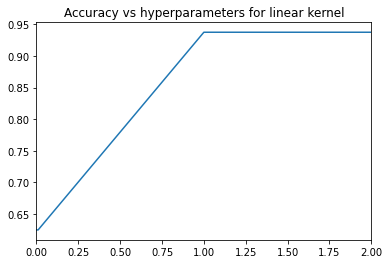

In [21]:
plt.figure()
plt.plot(linear_grid['params'],linear_grid['accuracy'])
plt.xlim([0,2])
plt.title("Accuracy vs hyperparameters for linear kernel")

**Confusion Matrix- Linear Kernal**

Confusion matrix :
 [[7 0 0]
 [0 4 0]
 [0 1 3]]


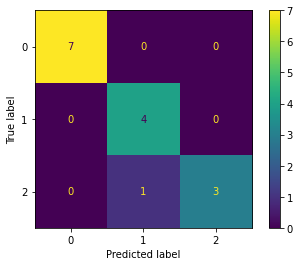

In [22]:
cm=confusion_matrix(Test["Species"],pred_test)
print("Confusion matrix :\n",cm)
disp_lin = ConfusionMatrixDisplay(cm)
disp_lin.plot()
plt.show()

**Sensitivity and Specifivity- Linear Kernal**

For Setosa

In [23]:
tp=cm[0,0]
fn=cm[0,1]+cm[0,2]
fp=cm[1,0]+cm[2,0]
tn=cm[1,1]+cm[1,2]+cm[2,1]+cm[2,2]

In [24]:
sensitivity = tp/(tp+fn)
print('Sensitivity for Setosa: ', sensitivity )

specificity = tn/(tn+fp)
print('Specificity for Setosa : ', specificity)

Sensitivity for Setosa:  1.0
Specificity for Setosa :  1.0


For Versicolor

In [25]:
tp=cm[1,1]
fn=cm[1,0]+cm[1,2]
fp=cm[0,1]+cm[2,1]
tn=cm[0,0]+cm[0,2]+cm[2,0]+cm[2,2]

In [26]:
sensitivity = tp/(tp+fn)
print('Sensitivity for Versicolor: ', sensitivity )

specificity = tn/(tn+fp)
print('Specificity for Versicolor: ', specificity)

Sensitivity for Versicolor:  1.0
Specificity for Versicolor:  0.9090909090909091


For Virginia

In [27]:
tp=cm[2,2]
fn=cm[2,0]+cm[2,1]
fp=cm[0,2]+cm[1,2]
tn=cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]

In [28]:
sensitivity = tp/(tp+fn)
print('Sensitivity for Virginia: ', sensitivity )

specificity = tn/(tn+fp)
print('Specificity for Virginia: ', specificity)

Sensitivity for Virginia:  0.75
Specificity for Virginia:  1.0


**AUROC Score-Linear Kernal**

In [29]:
test_num=list()
for i in Test['Species']:
  if i=='setosa':
    test_num.append(1)
  elif i=='versicolor':
    test_num.append(2)
  elif i=='virginia':
    test_num.append(3)

pred_num=list()
for i in Test['Species']:
  if i=='setosa':
    pred_num.append(1)
  elif i=='versicolor':
    pred_num.append(2)
  elif i=='virginia':
    pred_num.append(3)

In [30]:
print('AUROC Score: ',roc_auc_score(test_num,pred_num,multi_class='ovr'))

AUROC Score:  1.0


**ROC Curve-Linear Kernal**

In [31]:
#plt.figure()
#plt.plot(roc_curve(Test["Species"],pred_test))
#plt.title("ROC Curve for Linear Kernal")

# **Polynomial Kernal**

In [32]:
kernel = ['poly']
C = [0.001,0.01,1,10,100]
gamma = ['scale']

In [33]:
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = 2
grid_search = GridSearchCV(estimator=SVC(), param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(Validation[["Sepal Length","Sepal Width","Petal Length","Petal Width"]], Validation[["Species"]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
print("Best: \n Accuracy %f using prameters: %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 
 Accuracy 0.937500 using prameters: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}


In [35]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
poly_grid = {'accuracy':[],'params':[]}

In [36]:
for mean, stdev, param in zip(means, stds, params):
  print("%f with: %r" % (mean, param))
  if param['kernel']=='poly':
    poly_grid['accuracy'].append(mean)
    poly_grid['params'].append(param['C'])

0.625000 with: {'C': 0.001, 'gamma': 'scale', 'kernel': 'poly'}
0.750000 with: {'C': 0.01, 'gamma': 'scale', 'kernel': 'poly'}
0.937500 with: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
0.937500 with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.937500 with: {'C': 100, 'gamma': 'scale', 'kernel': 'poly'}


In [37]:
test_grid = dict(kernel = [grid_result.best_params_['kernel']], C = [grid_result.best_params_['C']], gamma = [grid_result.best_params_['gamma']])
test_grid_search = GridSearchCV(estimator=SVC(), param_grid=test_grid, n_jobs=-1, cv=2, scoring='accuracy',error_score=0)
test_grid_result = test_grid_search.fit(Validation[["Sepal Length","Sepal Width","Petal Length","Petal Width"]], Validation[["Species"]])
pred_test = test_grid_result.predict(Test[["Sepal Length","Sepal Width","Petal Length","Petal Width"]])
print("Accuracy on best parameters from polynomial kernel: ",test_grid_result.score(Test[["Sepal Length","Sepal Width","Petal Length","Petal Width"]], Test[["Species"]]))

Accuracy on best parameters from polynomial kernel:  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Accuracy-Polynomial Kernal**

Text(0.5, 1.0, 'Accuracy vs hyperparameters for polynomial kernel')

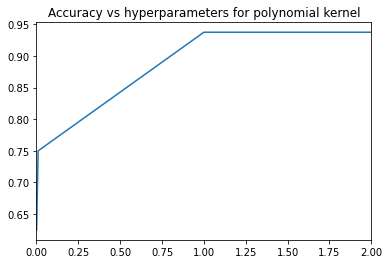

In [38]:
plt.figure()
plt.plot(poly_grid['params'],poly_grid['accuracy'])
plt.xlim([0,2])
plt.title("Accuracy vs hyperparameters for polynomial kernel")

**Confusion Matrix-Polynomial Kernal**

Confusion matrix :
 [[7 0 0]
 [0 4 0]
 [0 0 4]]


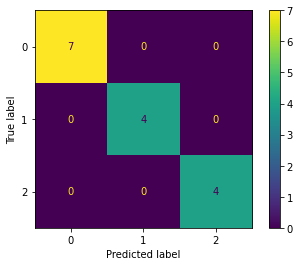

In [39]:
cm=confusion_matrix(Test["Species"],pred_test)
print("Confusion matrix :\n",cm)
disp_poly = ConfusionMatrixDisplay(cm)
disp_poly.plot()
plt.show()

**Sensitivity and Specifivity - Polynomial Kernal**

For Setosa

In [40]:
tp=cm[0,0]
fn=cm[0,1]+cm[0,2]
fp=cm[1,0]+cm[2,0]
tn=cm[1,1]+cm[1,2]+cm[2,1]+cm[2,2]

In [41]:
sensitivity = tp/(tp+fn)
print('Sensitivity for Setosa: ', sensitivity )

specificity = tn/(tn+fp)
print('Specificity for Setosa : ', specificity)

Sensitivity for Setosa:  1.0
Specificity for Setosa :  1.0


For Versicolor

In [42]:
tp=cm[1,1]
fn=cm[1,0]+cm[1,2]
fp=cm[0,1]+cm[2,1]
tn=cm[0,0]+cm[0,2]+cm[2,0]+cm[2,2]

In [43]:
sensitivity = tp/(tp+fn)
print('Sensitivity for Versicolor: ', sensitivity )

specificity = tn/(tn+fp)
print('Specificity for Versicolor: ', specificity)

Sensitivity for Versicolor:  1.0
Specificity for Versicolor:  1.0


For Virginia

In [44]:
tp=cm[2,2]
fn=cm[2,0]+cm[2,1]
fp=cm[0,2]+cm[1,2]
tn=cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]

In [45]:
sensitivity = tp/(tp+fn)
print('Sensitivity for Virginia: ', sensitivity )

specificity = tn/(tn+fp)
print('Specificity for Virginia: ', specificity)

Sensitivity for Virginia:  1.0
Specificity for Virginia:  1.0


**AUROC Score- Polynomial Kernal**

In [46]:
test_num=list()
for i in Test['Species']:
  if i=='setosa':
    test_num.append(1)
  elif i=='versicolor':
    test_num.append(2)
  elif i=='virginia':
    test_num.append(3)

pred_num=list()
for i in Test['Species']:
  if i=='setosa':
    pred_num.append(1)
  elif i=='versicolor':
    pred_num.append(2)
  elif i=='virginia':
    pred_num.append(3)

In [47]:
print('AUROC Score: ',roc_auc_score(test_num,pred_num,multi_class='ovr'))

AUROC Score:  1.0


**ROC Curve- Polynomial Kernal**

In [48]:
#plt.figure()
#plt.plot(roc_curve(Test["Species"],pred_test))
#plt.title("ROC Curve for Linear Kernal")

# RBF Kernal

In [49]:
kernel = ['rbf']
C = [0.001,0.01,1,10,100]
gamma = [0.1,1,10]

In [50]:
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = 2
grid_search = GridSearchCV(estimator=SVC(), param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(Validation[["Sepal Length","Sepal Width","Petal Length","Petal Width"]], Validation[["Species"]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
print("Best: \n Accuracy %f using prameters: %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 
 Accuracy 0.937500 using prameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [52]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
rbf_grid = {'accuracy':[],'params':[]}

In [53]:
for mean, stdev, param in zip(means, stds, params):
  print("%f with: %r" % (mean, param))
  if param['kernel']=='rbf':
    rbf_grid['accuracy'].append(mean)
    rbf_grid['params'].append(param['C'])

0.625000 with: {'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}
0.625000 with: {'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}
0.562500 with: {'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}
0.625000 with: {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
0.625000 with: {'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}
0.562500 with: {'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}
0.812500 with: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.937500 with: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.562500 with: {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
0.937500 with: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.937500 with: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.625000 with: {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
0.937500 with: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.937500 with: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
0.625000 with: {'C': 100, 'gamma': 10, 'kernel': 'rbf'}


In [54]:
test_grid = dict(kernel = [grid_result.best_params_['kernel']], C = [grid_result.best_params_['C']], gamma = [grid_result.best_params_['gamma']])
test_grid_search = GridSearchCV(estimator=SVC(), param_grid=test_grid, n_jobs=-1, cv=2, scoring='accuracy',error_score=0)
test_grid_result = test_grid_search.fit(Validation[["Sepal Length","Sepal Width","Petal Length","Petal Width"]], Validation[["Species"]])
pred_test = test_grid_result.predict(Test[["Sepal Length","Sepal Width","Petal Length","Petal Width"]])
print("Accuracy on best parameters from RBF kernel: ",test_grid_result.score(Test[["Sepal Length","Sepal Width","Petal Length","Petal Width"]], Test[["Species"]]))

Accuracy on best parameters from RBF kernel:  0.9333333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Accuracy-RBF Kernal**

Text(0.5, 1.0, 'Accuracy vs hyperparameters for polynomial kernel')

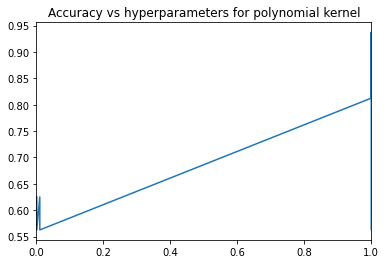

In [55]:
plt.figure()
plt.plot(rbf_grid['params'],rbf_grid['accuracy'])
plt.xlim([0,1])
plt.title("Accuracy vs hyperparameters for polynomial kernel")

**Confusion Matrix-RBF Kernal**

Confusion matrix :
 [[7 0 0]
 [0 4 0]
 [0 1 3]]


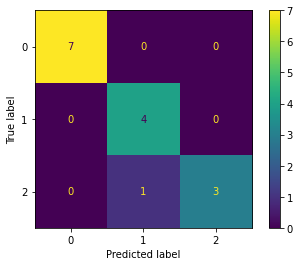

In [56]:
cm=confusion_matrix(Test["Species"],pred_test)
print("Confusion matrix :\n",cm)
disp_rbf = ConfusionMatrixDisplay(cm)
disp_rbf.plot()
plt.show()

**Sensitivity and Specificity-RBF Kernal**

For Setosa

In [57]:
tp=cm[0,0]
fn=cm[0,1]+cm[0,2]
fp=cm[1,0]+cm[2,0]
tn=cm[1,1]+cm[1,2]+cm[2,1]+cm[2,2]

In [58]:
sensitivity = tp/(tp+fn)
print('Sensitivity for Setosa: ', sensitivity )

specificity = tn/(tn+fp)
print('Specificity for Setosa : ', specificity)

Sensitivity for Setosa:  1.0
Specificity for Setosa :  1.0


For Versicolor

In [59]:
tp=cm[1,1]
fn=cm[1,0]+cm[1,2]
fp=cm[0,1]+cm[2,1]
tn=cm[0,0]+cm[0,2]+cm[2,0]+cm[2,2]

In [60]:
sensitivity = tp/(tp+fn)
print('Sensitivity for Versicolor: ', sensitivity )

specificity = tn/(tn+fp)
print('Specificity for Versicolor : ', specificity)

Sensitivity for Versicolor:  1.0
Specificity for Versicolor :  0.9090909090909091


For Virginia

In [61]:
tp=cm[2,2]
fn=cm[2,0]+cm[2,1]
fp=cm[0,2]+cm[1,2]
tn=cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]

In [62]:
sensitivity = tp/(tp+fn)
print('Sensitivity for Virginia: ', sensitivity )

specificity = tn/(tn+fp)
print('Specificity for Virginia : ', specificity)

Sensitivity for Virginia:  0.75
Specificity for Virginia :  1.0


**AUROC Score-RBF Kernal**

In [63]:
test_num=list()
for i in Test['Species']:
  if i=='setosa':
    test_num.append(1)
  elif i=='versicolor':
    test_num.append(2)
  elif i=='virginia':
    test_num.append(3)

pred_num=list()
for i in Test['Species']:
  if i=='setosa':
    pred_num.append(1)
  elif i=='versicolor':
    pred_num.append(2)
  elif i=='virginia':
    pred_num.append(3)

In [64]:
print('AUROC Score: ',roc_auc_score(test_num,pred_num,multi_class='ovr'))

AUROC Score:  1.0


ROC Curve-RBF Kernal

In [65]:
#plt.figure()
#plt.plot(roc_curve(Test["Species"],pred_test))
#plt.title("ROC Curve for Linear Kernal")